<a href="https://colab.research.google.com/github/rezakhanahmadi342341/projects/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
test_dir = '/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train'
train_dir = '/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train'

In [ ]:
class_name = ['angry', 'happy', 'sad']
train = keras.utils.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = class_name,
    seed = 3,
    image_size = (224, 224),
    # validation_split = 0.1,
    # subset = 'training'
)

Found 6799 files belonging to 3 classes.


In [ ]:
test = keras.utils.image_dataset_from_directory(
    test_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = class_name,
    seed = 3,
    image_size = (224, 224),
    # validation_split = 0.1,
    # subset = 'training'
)

Found 6799 files belonging to 3 classes.


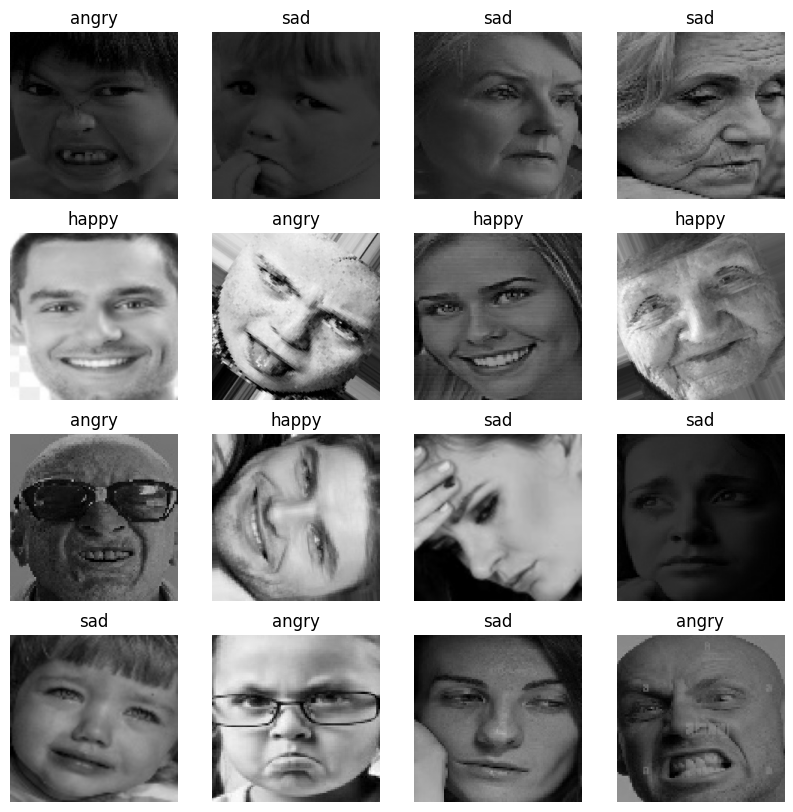

In [ ]:
plt.figure(figsize= (10,10))
for images, label in (train.take(3)):
  for i in range(16):
    ax1 = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(class_name[tf.argmax(label[i])])
    plt.axis('off')

In [ ]:
data_aug = keras.Sequential([
    layers.RandomBrightness(0.1),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1),
])

In [ ]:

model = keras.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Rescaling(1/255.),
    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.MaxPool2D((3, 3)), # Adjusted pooling size for consistency
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPool2D((2, 2)), # Adjusted pooling size for consistency
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes for classification
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 221, 221, 64)        │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 73, 73, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 71, 71, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 71, 71, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 35, 35, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 39200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │       1,254,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,277,059 (4.87 MB)

 Trainable params: 1,276,835 (4.87 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor= 'val_accuracy', patience= 3)

In [ ]:
hist = model.fit(train, batch_size=32, epochs=50, validation_data=test, callbacks= [callback]) # accuracy: 0.9351 - loss: 0.1688 - val_accuracy: 0.7410 - val_loss: 0.8765

Epoch 1/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.4062 - loss: 1.2926 - val_accuracy: 0.4886 - val_loss: 1.0212
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4871 - loss: 1.0698 - val_accuracy: 0.3503 - val_loss: 1.6443
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5272 - loss: 1.0037 - val_accuracy: 0.5689 - val_loss: 0.9525
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5644 - loss: 0.9230 - val_accuracy: 0.5923 - val_loss: 0.8990
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6038 - loss: 0.8605 - val_accuracy: 0.5680 - val_loss: 0.8887
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6176 - loss: 0.8423 - val_accuracy: 0.6938 - val_loss: 0.7235
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6464 - loss: 0.7858 - val_accuracy: 0.6670 - val_loss: 0.7348
Epoch 8/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6717 - loss: 0.7677 - val_acc

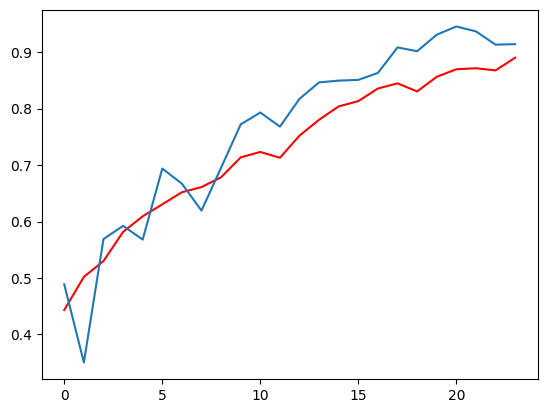

In [ ]:
plt.plot(hist.history['accuracy'], color= 'r')
plt.plot(hist.history['val_accuracy'])
plt.show()

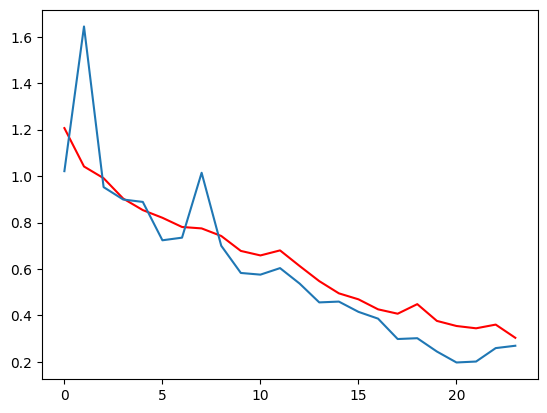

In [ ]:
plt.plot(hist.history['loss'], color= 'r')
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
model.save('imotion_detection.h5')